## Lab Notebook - Rift Inversion Project ##
This Jupyter notebooks serves as a record of modeling runs done on Stampede2 as part of the rift inversion project. Each cell includes a note of the current modeling goal and the code to generate the resulting models, as well as a report on the model results.

__NOTE__: Never run all cells, model inputs are designed to be temporary

In [10]:
import os
import filecmp
import ripropagate

# Key function: generate
# Parameters in generate: lthick,evel,etime,output,ver,soft,shell,file

## 1/5/2022 ##
* 600 km models were running really slow, so we're reverting back to 400 km depth models
* However, need to add 2 km zone in to avoid abrupt transition from 1 to 4 km resolution

In [2]:
ripropagate.generate(etime=12.5,evel=1,output='./010522_ri',file='ri_base.prm',soft=0.375,depth=400,shell='run_base_nal.sh')

## 1/6/2022 ##
* Finished rifting, inverting now

In [2]:
ripropagate.generate(etime=32.5,evel=-1,output='./010622_ri',file='ri_base.prm',soft=0.375,depth=400,shell='run_base_nal.sh')

## 1/13/2022 ##
* Inversion successful, but orogen result different from old (1 then 4 km) AMR scheme - going to try with 1 km all the way down and a deeper transition to 2 km

In [3]:
ripropagate.generate(etime=12.5,evel=1,output='./011322_ri_a',file='ri_base_all1km.prm',soft=0.375,depth=400,shell='run_base_nal.sh',
                    ver='a')
ripropagate.generate(etime=12.5,evel=1,output='./011322_ri_b',file='ri_base_1kmdeep.prm',soft=0.375,depth=400,shell='run_base_nal.sh',
                    ver='b')

## 1/14/2022 ##
* B model finished rifting, inverting now.

In [2]:
ripropagate.generate(etime=32.5,evel=-1,output='./011422_ri_b',file='ri_base_1kmdeep.prm',soft=0.375,depth=400,shell='run_base_nal.sh',
                    ver='b')

## 1/15/2022 ##
* A model finished rifting, starting that inversion

In [2]:
ripropagate.generate(etime=32.5,evel=-1,output='./011522_ri_a',file='ri_base_all1km.prm',soft=0.375,depth=400,shell='run_base_nal.sh',
                    ver='a')

## 1/27/2022 ##
* rewrote composition script generator to have random seed input
* testing this now to observe if files are identical

['composition.txt', 'composition_test.txt']
True


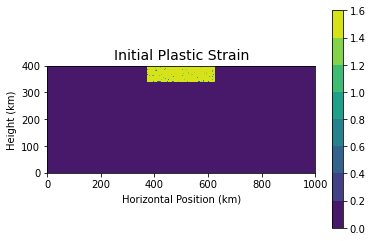

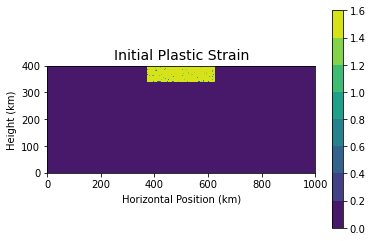

In [16]:
os.makedirs('random_seed_test',exist_ok=True)
ripropagate.comp_ascii(y=400,output='./random_seed_test',seed=25)


original = './random_seed_test/composition.txt'
new = './random_seed_test/composition_test.txt'

os.replace(original,new)
ripropagate.comp_ascii(y=400,output='./random_seed_test',seed=25)
print(os.listdir('./random_seed_test'))

# Diff the two files
result = filecmp.cmp(original, new, shallow=False)

# Should be true if files identical
print(result)